## HR Analytics
Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

In [1]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Read .csv file
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [41]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Data Exploration and Visualization

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Employees left
left = df[df.left==1]
left.shape

(3571, 10)

In [6]:
# Employees retained
retained = df[df.left==0]
retained.shape

(11428, 10)

### Mean of features groupby Left

In [7]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### Insights from above:

The "satisfaction_level" seems to be relatively low (0.44) in employees leaving firms compared to retained ones (0.66).
The "Avergae_monthly_hours" spent by employees leaving the firm  is higher compared to retained ones.
The "Promotion_last_5years" employees who received promotion are likey to be retained in the firm.


In [8]:
emp_retained = df['satisfaction_level'][df['left']==0].mean()
stats.ttest_1samp(a=df[df['left'] == 1]['satisfaction_level'], popmean=emp_retained)

Ttest_1sampResult(statistic=-51.3303486754725, pvalue=0.0)

### Impact of salries on employee retention

<AxesSubplot:xlabel='salary'>

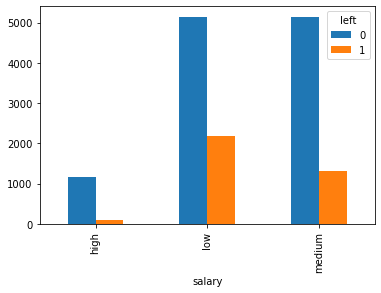

In [9]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

From the above plot we could observe that employees with hgh salary are likey to retain in the firm.

### Corelation between department and employee retention

<AxesSubplot:xlabel='Department'>

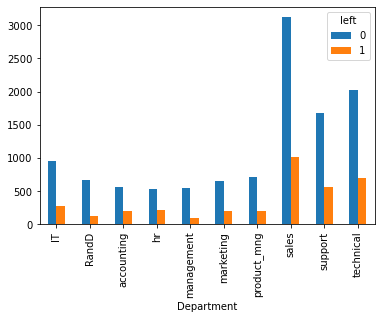

In [10]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

From the plot we could see there is slight a employee retained has slight correlation with department but its not major.

### Check for correlation

In [12]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

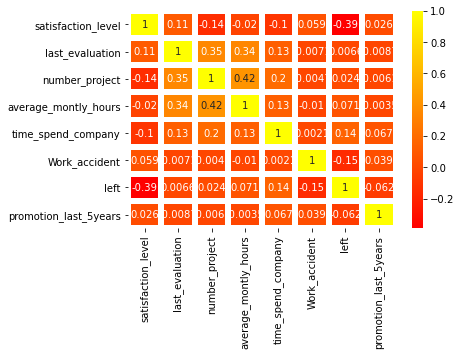

In [13]:
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, annot=True, linewidth=4.8, cmap="autumn")

From the correlation check we could observe that fetaures last_evaluation, number_project, work_accident features has weak correlation with 'left'

In [14]:
# Creating new dataframe with features useful for building model
df2 = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
df2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Creating (n-1) dummy variables for Salary categorical feature

In [15]:
dummies = pd.get_dummies(df.salary, prefix="salary")
df3 = pd.concat([df2,dummies], axis=1)
df3.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [16]:
# Dropping categorical feature 'salary' as dummies are alreday being created.
# Dropping 'salary_high' for to avoid multicollinerity
df4 = df3.drop(['salary', 'salary_high'], axis='columns')
df4.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


### Building Logistic Regression Model

In [17]:
X = df4
y = df.left

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [19]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [20]:
reg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
reg.coef_

array([[-3.74094047e+00,  2.51338688e-03, -1.21743414e+00,
         1.72600828e+00,  1.25437165e+00]])

In [22]:
reg.intercept_

array([-0.98265374])

### Accuracy of a Model

In [23]:
reg.score(X_test,y_test)
print("Accuracy on Training set: ",reg.score(X_train,y_train))
print("Accuracy on Testing set: ",reg.score(X_test,y_test))

Accuracy on Training set:  0.7763596533003143
Accuracy on Testing set:  0.7742222222222223


### Logistic Regression Model Error Table

In [24]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = reg.predict(X_test)
print("\t\tError Table")
print('Mean Absolute Error     : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error         : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error     :  0.22577777777777777
Mean Squared Error      :  0.22577777777777777
Root Mean Squared Error :  0.4751607914988123
R Squared Error         :  -0.2546586612199333


### Building Decision Tree classifier Model

In [25]:
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
modeltree = tree.DecisionTreeClassifier()
modeltree.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
print('Model Accuracy on train data:', modeltree.score(X_train,y_train))
print('Model Accuracy on test data :', modeltree.score(X_test,y_test))

Model Accuracy on train data: 0.9834269930469568
Model Accuracy on test data : 0.9228888888888889


In [27]:
y_pred = modeltree.predict(X_test)
print("\t\tError Table")
print('Mean Absolute Error     : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error         : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error     :  0.07711111111111112
Mean Squared Error      :  0.07711111111111112
Root Mean Squared Error :  0.2776888746621137
R Squared Error         :  0.5720486222925533


### Random Forest Classifier Model

In [28]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
randommodel = RandomForestClassifier()
randommodel.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
print('Random Model Accuracy on train data:', randommodel.score(X_train,y_train))
print('Random model Accuracy on test data: ', randommodel.score(X_test,y_test))

Random Model Accuracy on train data: 0.9829507572149728
Random model Accuracy on test data:  0.9337777777777778


In [30]:
y_pred = randommodel.predict(X_test)
print('\t\tError Table')
print('Mean Absolute Error       :', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error        :', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error   :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error       :', metrics.r2_score(y_test,y_pred))

		Error Table
Mean Absolute Error       : 0.06622222222222222
Mean Squared Error        : 0.06622222222222222
Root Mean Squared Error   : 0.2573367875415838
Mean Absolute Error       : 0.6373986149221962


### Area Under-Receiving Operating Characteristic Curve Evaluation Metric

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

# Getting predicted probabilities
y_score1 = reg.predict_proba(X_test)[:,1]
y_score2 = modeltree.predict_proba(X_test)[:,1]
y_score3 = randommodel.predict_proba(X_test)[:,1]
# Creating true and false positive rate
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)

reg_roc_auc    = roc_auc_score(y_test, y_score1)
tree_roc_auc   = roc_auc_score(y_test, y_score2)
random_roc_auc = roc_auc_score(y_test, y_score3)

print('roc_auc_score for Logistic Regression: ', reg_roc_auc)
print('roc_auc_score for DecisionTree: ', tree_roc_auc)
print('roc_auc_score for RandomForest: ', random_roc_auc)


roc_auc_score for Logistic Regression:  0.7626991603655325
roc_auc_score for DecisionTree:  0.9700441503013836
roc_auc_score for RandomForest:  0.9662965933315956


### Ploting ROC Curve

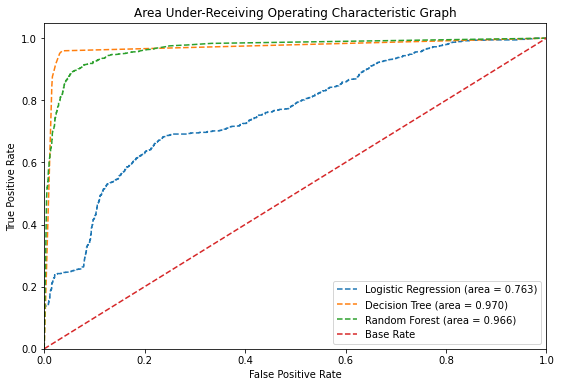

In [40]:
plt.figure(figsize=(9, 6))

# Plot Logistic Regression ROC
plt.plot(false_positive_rate1, true_positive_rate1, linestyle= '--',label='Logistic Regression (area = %0.3f)' % reg_roc_auc)

# Plot Decision Tree ROC
plt.plot(false_positive_rate2, true_positive_rate2, linestyle= '--',label='Decision Tree (area = %0.3f)' % tree_roc_auc)

# Plot Random Forest ROC
plt.plot(false_positive_rate3, true_positive_rate3, linestyle= '--', label='Random Forest (area = %0.3f)' % random_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],linestyle= '--',label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under-Receiving Operating Characteristic Graph')
plt.legend(loc="lower right")
plt.show()

### Conclusion

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

It is evident from the plot that the AUC for the Decision Tree ROC curve(area=0.97) is higher than that for the Logistic(area=0.763). But almost equal to Random Forest ROC curves(area=0.966). 

Therefore, we can say that Decision Tree did a better job of classifying the positive class in the dataset.